In [ ]:
%pip install kaggle
%pip install pandas openpyxl


Configuring Kaggle

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
#loading dastaset
!kaggle datasets download -d kushagra3204/sentiment-and-emotion-analysis-dataset


In [17]:
#unzipping and viewing the files
!unzip -l sentiment-and-emotion-analysis-dataset.zip



Archive:  sentiment-and-emotion-analysis-dataset.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
 43819946  2024-12-11 17:08   archive/combined_emotion.csv
   262670  2024-12-11 17:08   archive/combined_sentiment_data.csv
---------                     -------
 44082616                     2 files


In [19]:
# Unzip the csv files correctly,
!unzip -o sentiment-and-emotion-analysis-dataset.zip


Archive:  sentiment-and-emotion-analysis-dataset.zip
  inflating: archive/combined_emotion.csv  
  inflating: archive/combined_sentiment_data.csv  


In [ ]:
# Install required libraries
!pip install plotly seaborn nltk wordcloud scikit-learn matplotlib pandas
!pip install numpy==1.23.0



 Importing Libraries

In [38]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

import nltk
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Step 1: DATA LOADING AND PREPROCESSING

In [21]:
# Loading the CSV
import pandas as pd

df_emotion = pd.read_csv('archive/combined_emotion.csv')
df_sentiment = pd.read_csv('archive/combined_sentiment_data.csv')

# Display the first few rows to confirm
print("📘 Emotion Dataset Preview:")
print(df_emotion.head())

print("\n📕 Sentiment Dataset Preview:")
print(df_sentiment.head())


📘 Emotion Dataset Preview:
                                            sentence emotion
0      i just feel really helpless and heavy hearted    fear
1  ive enjoyed being able to slouch about relax a...     sad
2  i gave up my internship with the dmrg and am f...    fear
3                         i dont know i feel so lost     sad
4  i am a kindergarten teacher and i am thoroughl...    fear

📕 Sentiment Dataset Preview:
                                            sentence sentiment
0  So there is no way for me to plug it in here i...  negative
1                        Good case, Excellent value.  positive
2                             Great for the jawbone.  positive
3  Tied to charger for conversations lasting more...  negative
4                                  The mic is great.  positive


In [28]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Lemmatization
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    return text

# Apply the cleaning function to the 'sentence' column in both datasets
df_emotion['cleaned_sentence'] = df_emotion['sentence'].apply(clean_text)
df_sentiment['cleaned_sentence'] = df_sentiment['sentence'].apply(clean_text)

# Display the first few rows after cleaning to check
print("📘 Cleaned Emotion Dataset Preview:")
print(df_emotion[['sentence', 'cleaned_sentence']].head())

print("\n📕 Cleaned Sentiment Dataset Preview:")
print(df_sentiment[['sentence', 'cleaned_sentence']].head())

📘 Cleaned Emotion Dataset Preview:
                                            sentence  \
0      i just feel really helpless and heavy hearted   
1  ive enjoyed being able to slouch about relax a...   
2  i gave up my internship with the dmrg and am f...   
3                         i dont know i feel so lost   
4  i am a kindergarten teacher and i am thoroughl...   

                                    cleaned_sentence  
0                 feel really helpless heavy hearted  
1  ive enjoyed able slouch relax unwind frankly n...  
2            gave internship dmrg feeling distraught  
3                                dont know feel lost  
4  kindergarten teacher thoroughly weary job take...  

📕 Cleaned Sentiment Dataset Preview:
                                            sentence  \
0  So there is no way for me to plug it in here i...   
1                        Good case, Excellent value.   
2                             Great for the jawbone.   
3  Tied to charger for conversations

Step 2: EXPLORATORY DATA ANALYSIS(EDA)

Count Plot for Sentiment/Emotion Category

<ipython-input-29-c7a968bb402f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_emotion, x='emotion', palette='viridis')


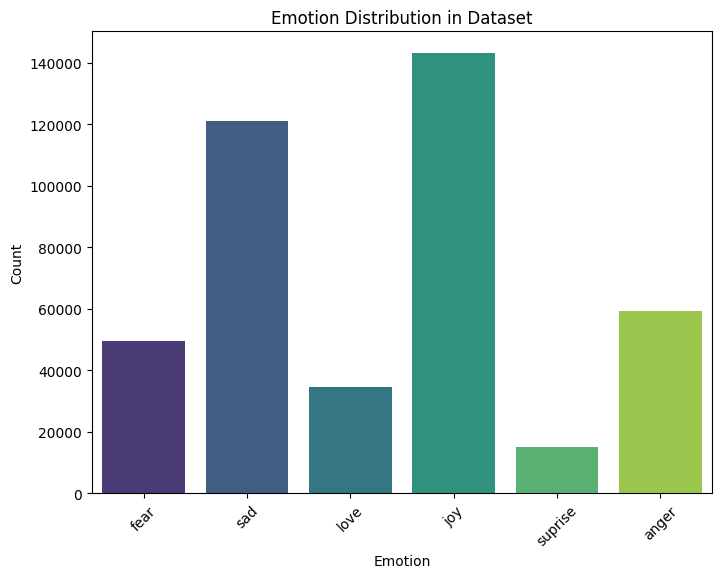

<ipython-input-29-c7a968bb402f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sentiment, x='sentiment', palette='viridis')


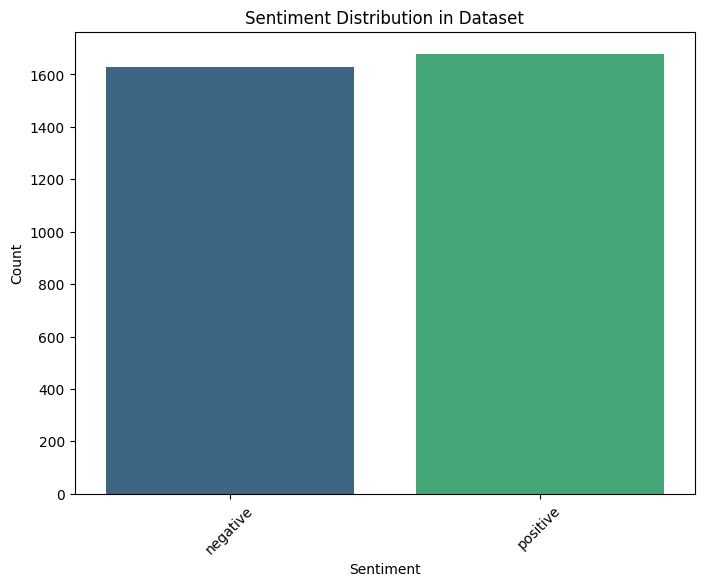

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot of emotion categories
plt.figure(figsize=(8, 6))
sns.countplot(data=df_emotion, x='emotion', palette='viridis')
plt.title("Emotion Distribution in Dataset")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Count plot of sentiment categories
plt.figure(figsize=(8, 6))
sns.countplot(data=df_sentiment, x='sentiment', palette='viridis')
plt.title("Sentiment Distribution in Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


Word Cloud for each Category

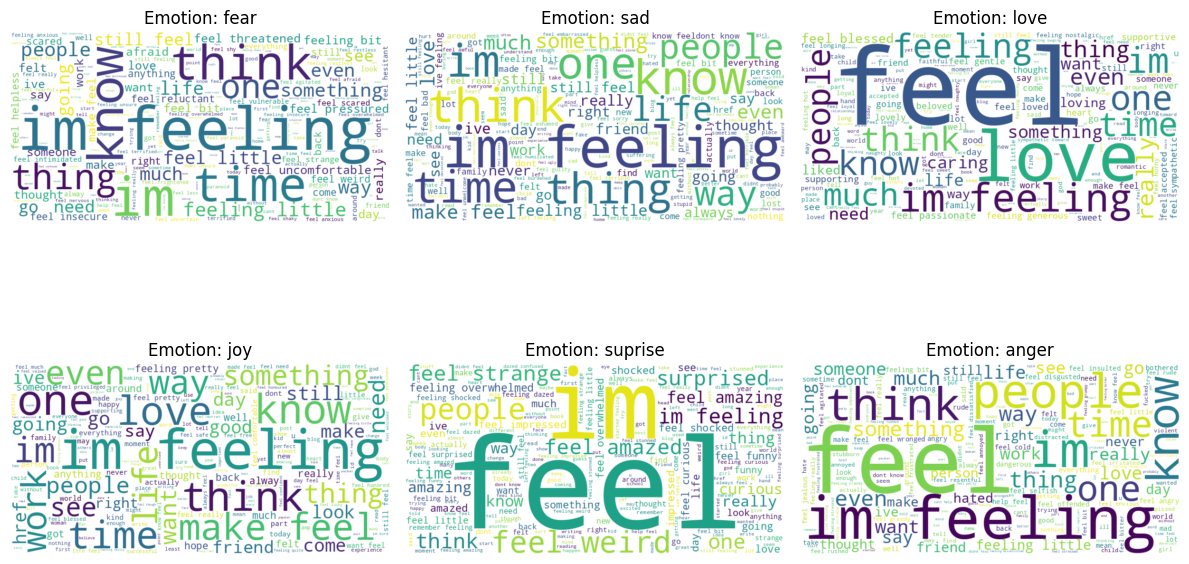

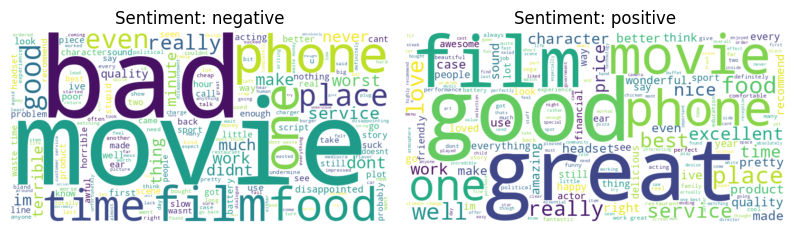

In [30]:
from wordcloud import WordCloud

# Generate WordCloud for emotion categories
plt.figure(figsize=(12, 8))
for emotion in df_emotion['emotion'].unique():
    plt.subplot(2, 3, list(df_emotion['emotion'].unique()).index(emotion) + 1)
    emotion_text = ' '.join(df_emotion[df_emotion['emotion'] == emotion]['cleaned_sentence'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(emotion_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Emotion: {emotion}')
plt.tight_layout()
plt.show()

# Generate WordCloud for sentiment categories
plt.figure(figsize=(12, 8))
for sentiment in df_sentiment['sentiment'].unique():
    plt.subplot(2, 3, list(df_sentiment['sentiment'].unique()).index(sentiment) + 1)
    sentiment_text = ' '.join(df_sentiment[df_sentiment['sentiment'] == sentiment]['cleaned_sentence'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Sentiment: {sentiment}')
plt.tight_layout()
plt.show()


Bar Chart for most Frequent Words

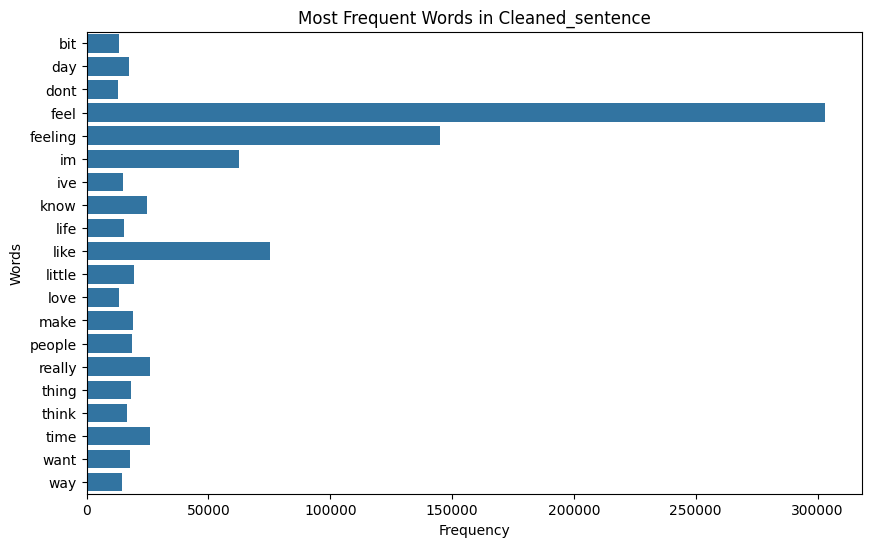

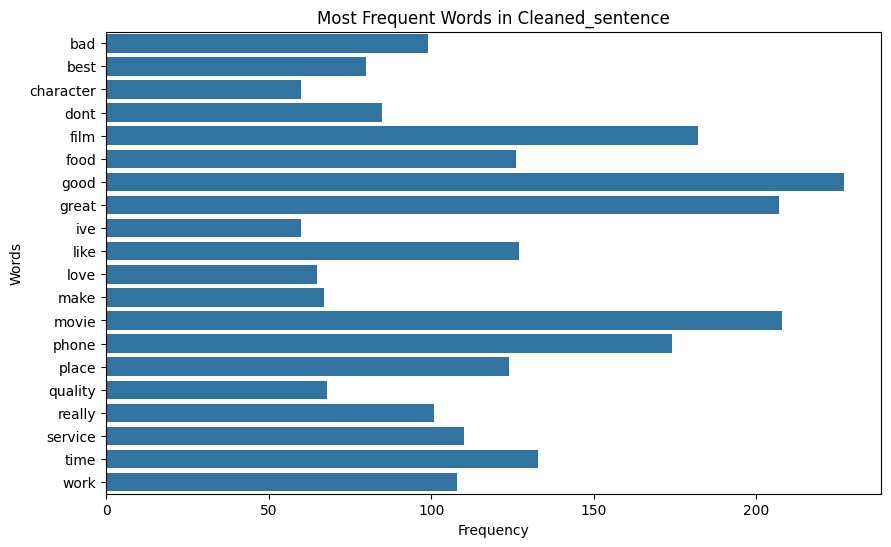

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Function to plot the most frequent words
def plot_most_frequent_words(data, column):
    vectorizer = CountVectorizer(stop_words='english', max_features=20)
    X = vectorizer.fit_transform(data[column])
    words = np.array(vectorizer.get_feature_names_out())
    frequencies = X.toarray().sum(axis=0)

    # Create a bar chart for the most frequent words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=frequencies, y=words)
    plt.title(f"Most Frequent Words in {column.capitalize()}")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

# Plot most frequent words for emotion dataset
plot_most_frequent_words(df_emotion, 'cleaned_sentence')

# Plot most frequent words for sentiment dataset
plot_most_frequent_words(df_sentiment, 'cleaned_sentence')


Box Plot of Text Length for Outlier Detection

<ipython-input-32-1e193f63a390>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emotion', y='text_length', data=df_emotion, palette='viridis')


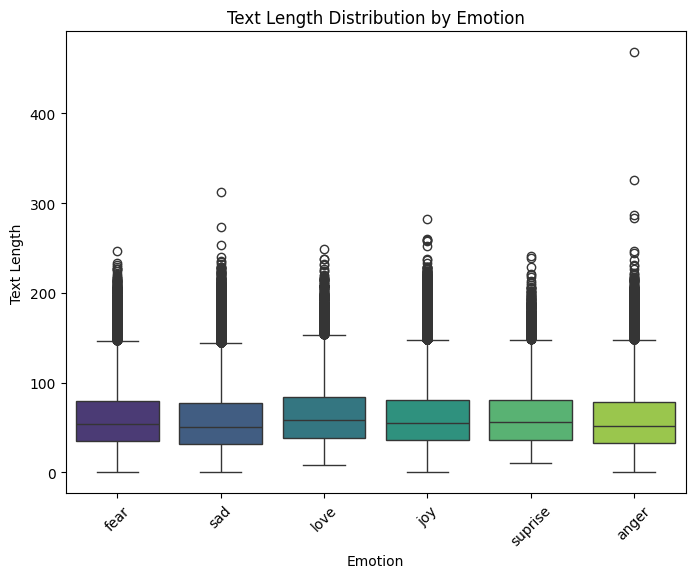

<ipython-input-32-1e193f63a390>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='text_length', data=df_sentiment, palette='viridis')


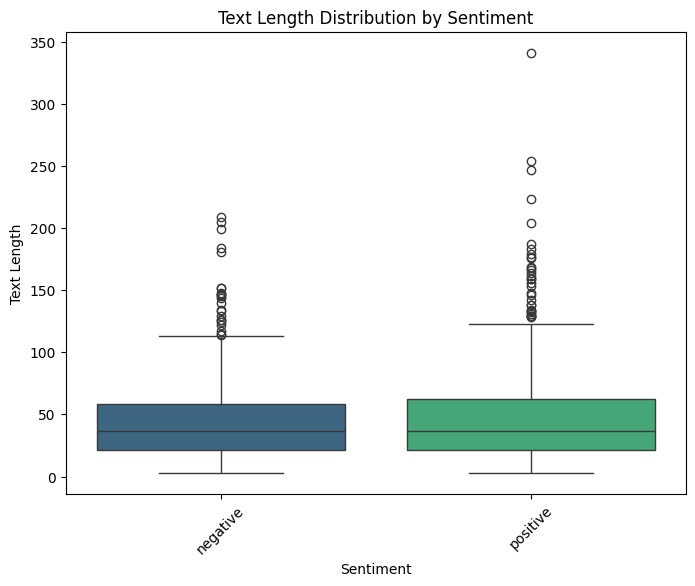

In [32]:
# Adding text length column to the datasets
df_emotion['text_length'] = df_emotion['cleaned_sentence'].apply(len)
df_sentiment['text_length'] = df_sentiment['cleaned_sentence'].apply(len)

# Box plot of text length per emotion category
plt.figure(figsize=(8, 6))
sns.boxplot(x='emotion', y='text_length', data=df_emotion, palette='viridis')
plt.title("Text Length Distribution by Emotion")
plt.xlabel("Emotion")
plt.ylabel("Text Length")
plt.xticks(rotation=45)
plt.show()

# Box plot of text length per sentiment category
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='text_length', data=df_sentiment, palette='viridis')
plt.title("Text Length Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Text Length")
plt.xticks(rotation=45)
plt.show()


Step 3: FEATURE ENGINEERING

Text to Numerical(TF-IDF and Count Vectorizer)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(df_sentiment['cleaned_sentence'])

# Count Vectorizer (You can use this as an alternative to TF-IDF)
count_vectorizer = CountVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_count = count_vectorizer.fit_transform(df_sentiment['cleaned_sentence'])

# View the shape of the transformed data (5000 features)
print(f"TF-IDF Shape: {X_tfidf.shape}")
print(f"Count Vectorizer Shape: {X_count.shape}")


TF-IDF Shape: (3309, 5000)
Count Vectorizer Shape: (3309, 5000)


Data for Model Training

In [34]:
# Define features (X) and labels (Y)
X = X_tfidf  # You can also use X_count if you prefer CountVectorizer
y = df_sentiment['sentiment']  # Sentiment labels (for sentiment dataset)

# Encoding labels (sentiment) to numeric values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Check the label encoding
print("Encoded labels: ", y_encoded[:10])


Encoded labels:  [0 1 1 0 1 0 0 1 0 0]


Step 4: DATA SPLITTING

In [35]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Print the size of the training and testing sets
print(f"Training data size: {X_train.shape[0]}")
print(f"Testing data size: {X_test.shape[0]}")


Training data size: 2647
Testing data size: 662


Step 5: MODEL TRAINING

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
svm = SVC(kernel='linear')
random_forest = RandomForestClassifier(n_estimators=100)
naive_bayes = MultinomialNB()

# Train the models
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)

# Predict using the trained models
log_reg_preds = log_reg.predict(X_test)
svm_preds = svm.predict(X_test)
rf_preds = random_forest.predict(X_test)
nb_preds = naive_bayes.predict(X_test)

# Print a sample of predictions
print("Sample predictions (Logistic Regression): ", log_reg_preds[:10])
print("Sample predictions (SVM): ", svm_preds[:10])


Sample predictions (Logistic Regression):  [0 0 1 0 1 0 1 0 0 0]
Sample predictions (SVM):  [0 0 1 0 1 0 1 0 0 0]


Step 6: EVALUATING MODEL PERFORMANCE

Model: LogisticRegression
Accuracy: 0.8111782477341389
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       334
           1       0.80      0.82      0.81       328

    accuracy                           0.81       662
   macro avg       0.81      0.81      0.81       662
weighted avg       0.81      0.81      0.81       662



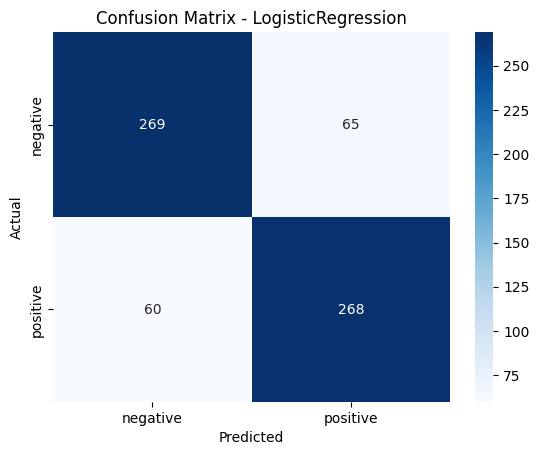

Model: SVC
Accuracy: 0.8111782477341389
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       334
           1       0.81      0.81      0.81       328

    accuracy                           0.81       662
   macro avg       0.81      0.81      0.81       662
weighted avg       0.81      0.81      0.81       662



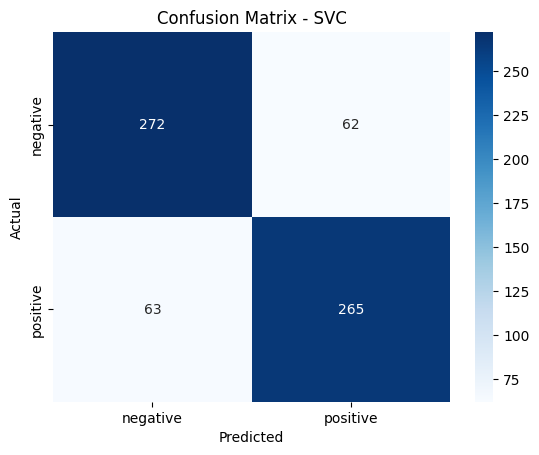

Model: RandomForestClassifier
Accuracy: 0.8096676737160121
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       334
           1       0.84      0.76      0.80       328

    accuracy                           0.81       662
   macro avg       0.81      0.81      0.81       662
weighted avg       0.81      0.81      0.81       662



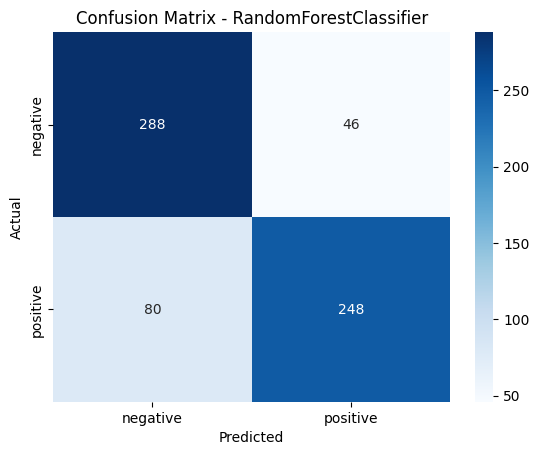

Model: MultinomialNB
Accuracy: 0.8021148036253777
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.80       334
           1       0.78      0.84      0.81       328

    accuracy                           0.80       662
   macro avg       0.80      0.80      0.80       662
weighted avg       0.80      0.80      0.80       662



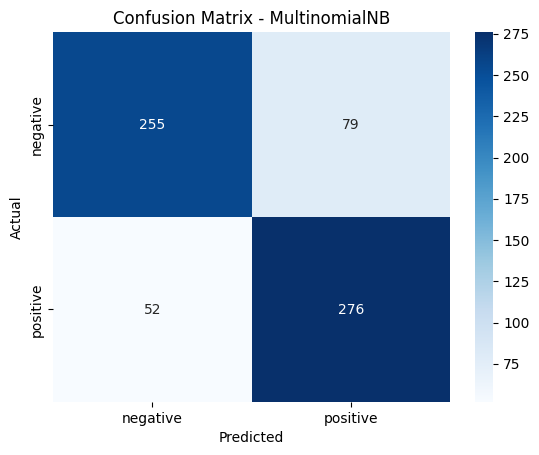

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict the test data
    y_pred = model.predict(X_test)

    # Print model name
    print(f"Model: {model.__class__.__name__}")

    # Accuracy score
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Classification report
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion matrix visualization
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Define your models
models = [
    LogisticRegression(max_iter=1000),
    SVC(kernel='linear'),
    RandomForestClassifier(n_estimators=100),
    MultinomialNB()
]

# Train and evaluate each model
for model in models:
    train_and_evaluate(model, X_train, y_train, X_test, y_test)




Step 7: Hyperparameter Tuning with GridSearchCV

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters found:  {'C': 10, 'solver': 'lbfgs'}

📊 Tuned Logistic Regression Evaluation Metrics:
Accuracy  : 0.8082
Precision : 0.8082
Recall    : 0.8082
F1-Score  : 0.8081


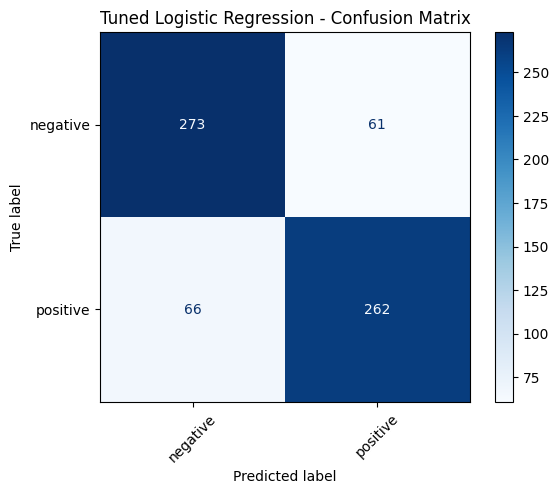

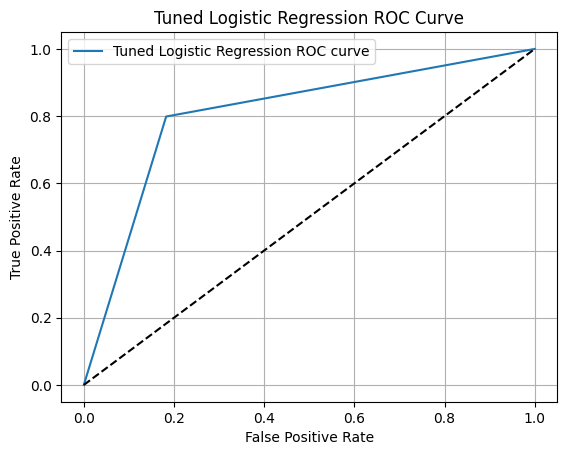

In [41]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the best model
best_model_preds = best_model.predict(X_test)
evaluate_model(y_test, best_model_preds, "Tuned Logistic Regression")
